In [101]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()



def load_special_edu_support_percentage(ignore_special_schools=False):
    
    melted_df = loader.load('students_with_special_educational_support')
    melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
    melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
    melted_df['male'] = pd.to_numeric(melted_df['male'], errors='coerce')
    melted_df['female'] = pd.to_numeric(melted_df['female'], errors='coerce')

    if(ignore_special_schools):
        melted_df = melted_df[melted_df['school']!="Special schools"] #filter out because their amount is so hight, we can't see the evolution of the other schools

    total_over_years = melted_df.groupby(['year','school'], as_index=False)[['male','female']].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    
    #children_type =  children_type[children_type['Gender']=='Total']
    children_type = children_type.rename(columns={'Students': 'Value'})
    
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')


    #child_amount_per_year = children_type.groupby(['year','school'], as_index=False)[['male_count','female_count']].sum()
    child_amount_per_year = children_type.groupby(['year','school', 'Gender'], as_index=False)['Value'].sum()

    pivot_table = child_amount_per_year.pivot_table(
    values='Value', 
    index=['year', 'school'], 
    columns='Gender', 
    aggfunc='sum'
    ).reset_index()

    pivot_table.columns = ['year', 'school', 'female_count', 'male_count', 'total_count']
    child_amount_per_year = pivot_table

    merged_df = pd.merge(total_over_years, child_amount_per_year, on=['year', 'school'])
    merged_df['relative_male'] = merged_df['male']/merged_df['male_count'] 
    merged_df['relative_female'] = merged_df['female']/merged_df['female_count'] 
    return merged_df

merged_df = load_special_edu_support_percentage()
merged_df

,year,school,male,female,female_count,male_count,total_count,relative_male,relative_female
0,2014-01-01,Free Waldorf Schools,264.0,150.0,39731.0,36800.0,76531.0,0.007174,0.003775
1,2014-01-01,Grammar schools (8 years of schooling),2853.0,1444.0,1056654.0,956855.0,2013509.0,0.002982,0.001367
2,2014-01-01,Grammar schools (9 years of schooling),180.0,100.0,154638.0,136399.0,291037.0,0.001320,0.000647
3,2014-01-01,Integrated comprehensive schools,17694.0,9828.0,392516.0,415298.0,807814.0,0.042606,0.025038
4,2014-01-01,Intermediate schools,3274.0,1301.0,466481.0,484225.0,950706.0,0.006761,0.002789
...,...,...,...,...,...,...,...,...,...
85,2022-01-01,Orientation stages independent of school type,4910.0,2905.0,56510.0,60178.0,116688.0,0.081591,0.051407
86,2022-01-01,Primary schools,57824.0,34047.0,1104337.0,1136162.0,2240502.0,0.050894,0.030830
87,2022-01-01,Schools with various courses of education,21692.0,11522.0,252615.0,292709.0,545321.0,0.074108,0.045611
88,2022-01-01,Secondary general schools,15350.0,9365.0,148208.0,185026.0,333239.0,0.082961,0.063188


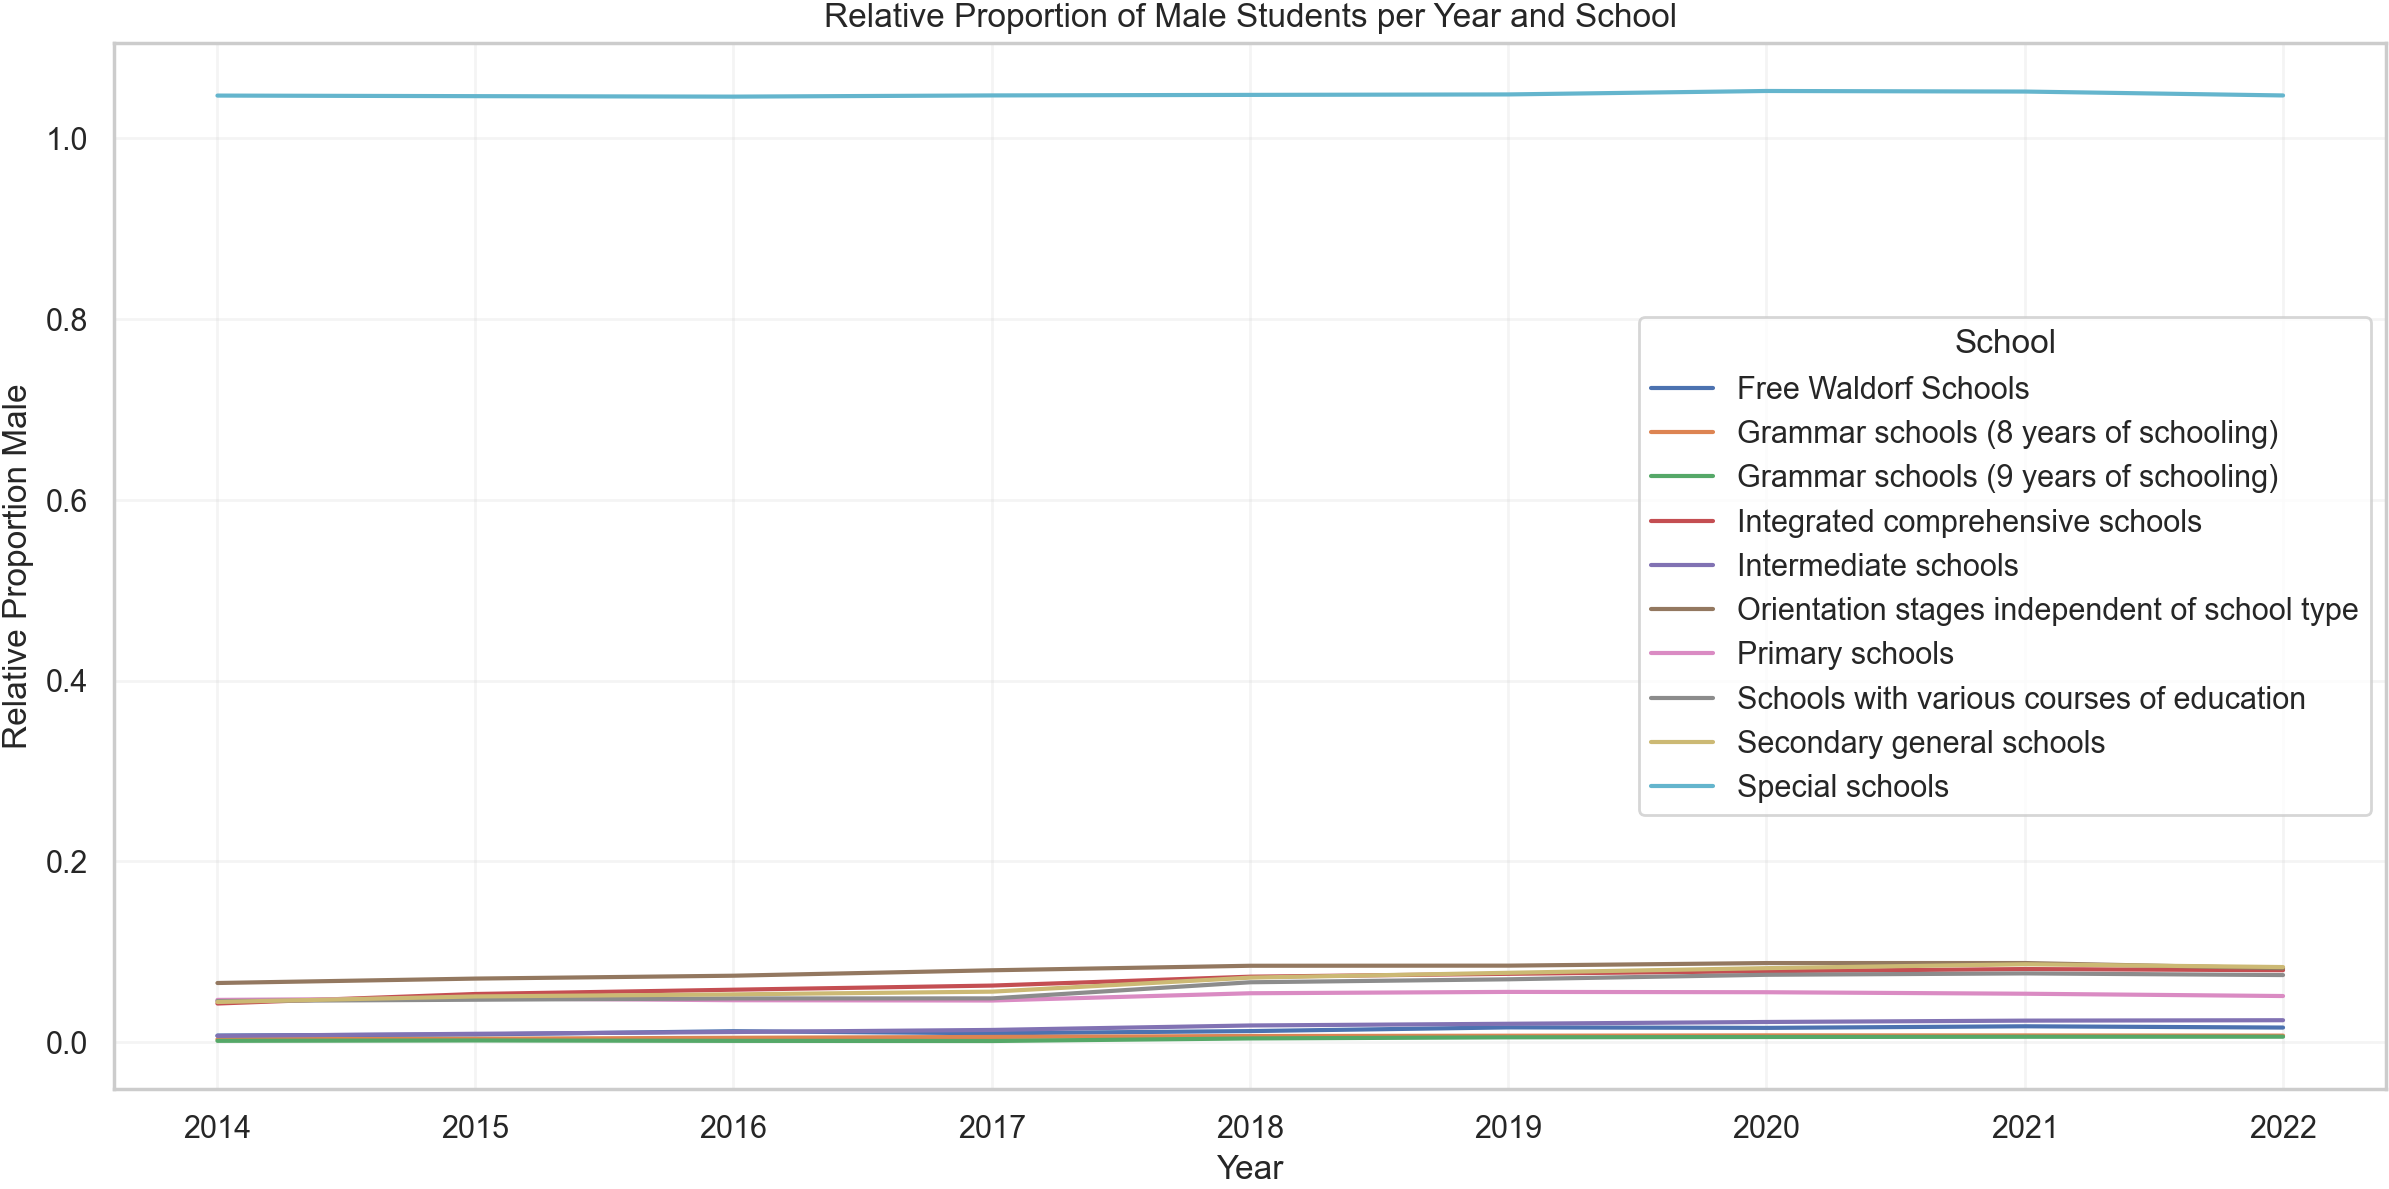

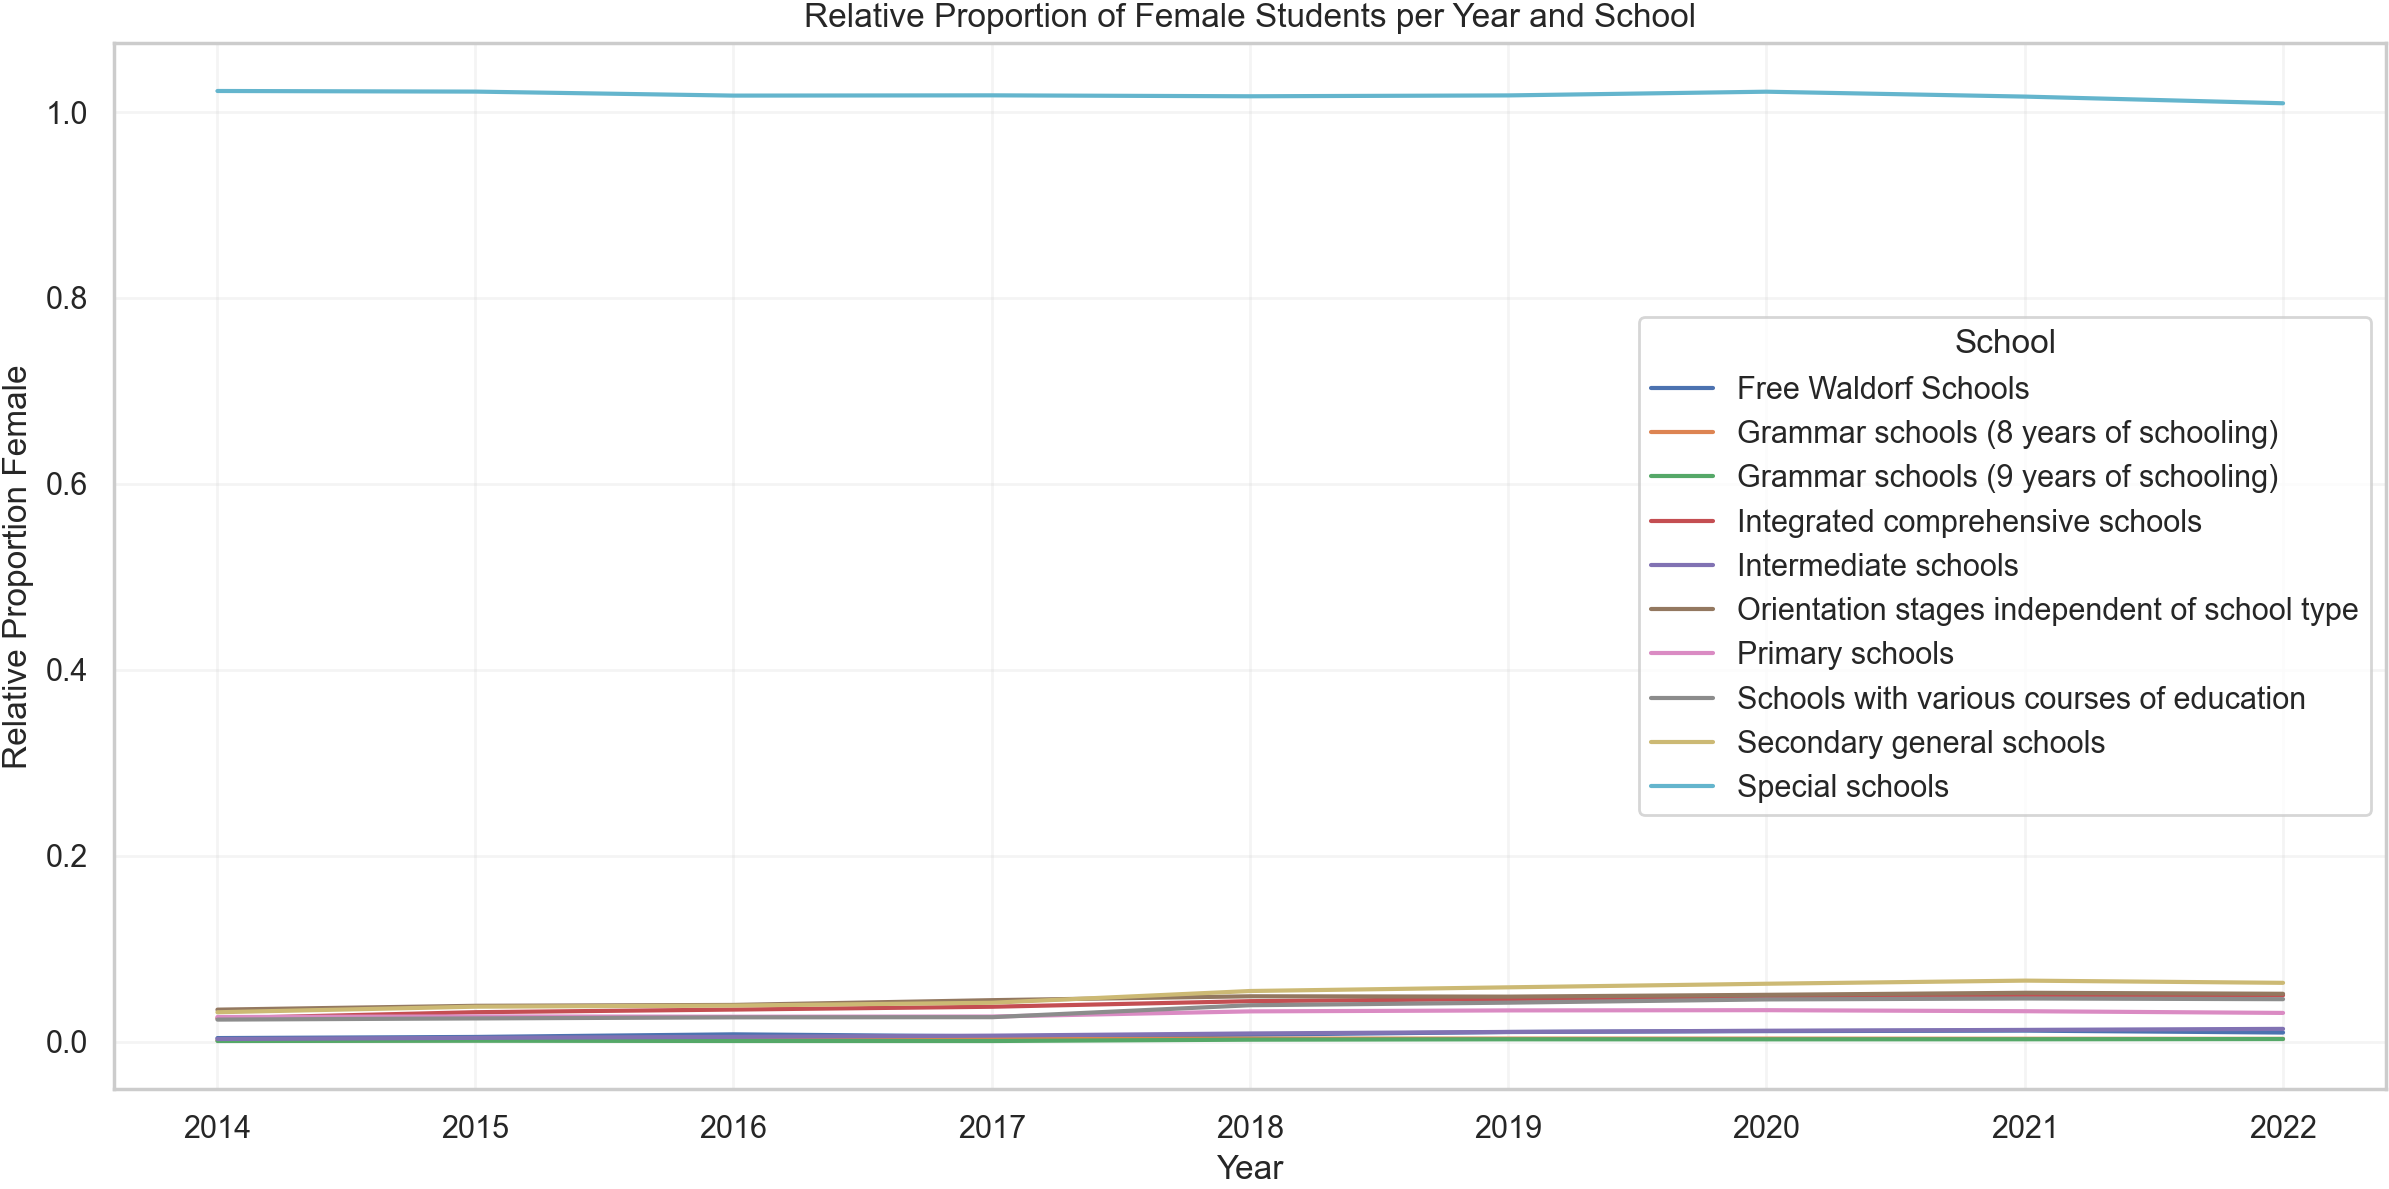

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jetzt können Sie die Visualisierung durchführen


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_male', hue='school', data=merged_df)
plt.title('Relative Proportion of Male Students per Year and School')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Male')
plt.legend(title='School')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_female', hue='school', data=merged_df)
plt.title('Relative Proportion of Female Students per Year and School')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Female')
plt.legend(title='School')

plt.show()

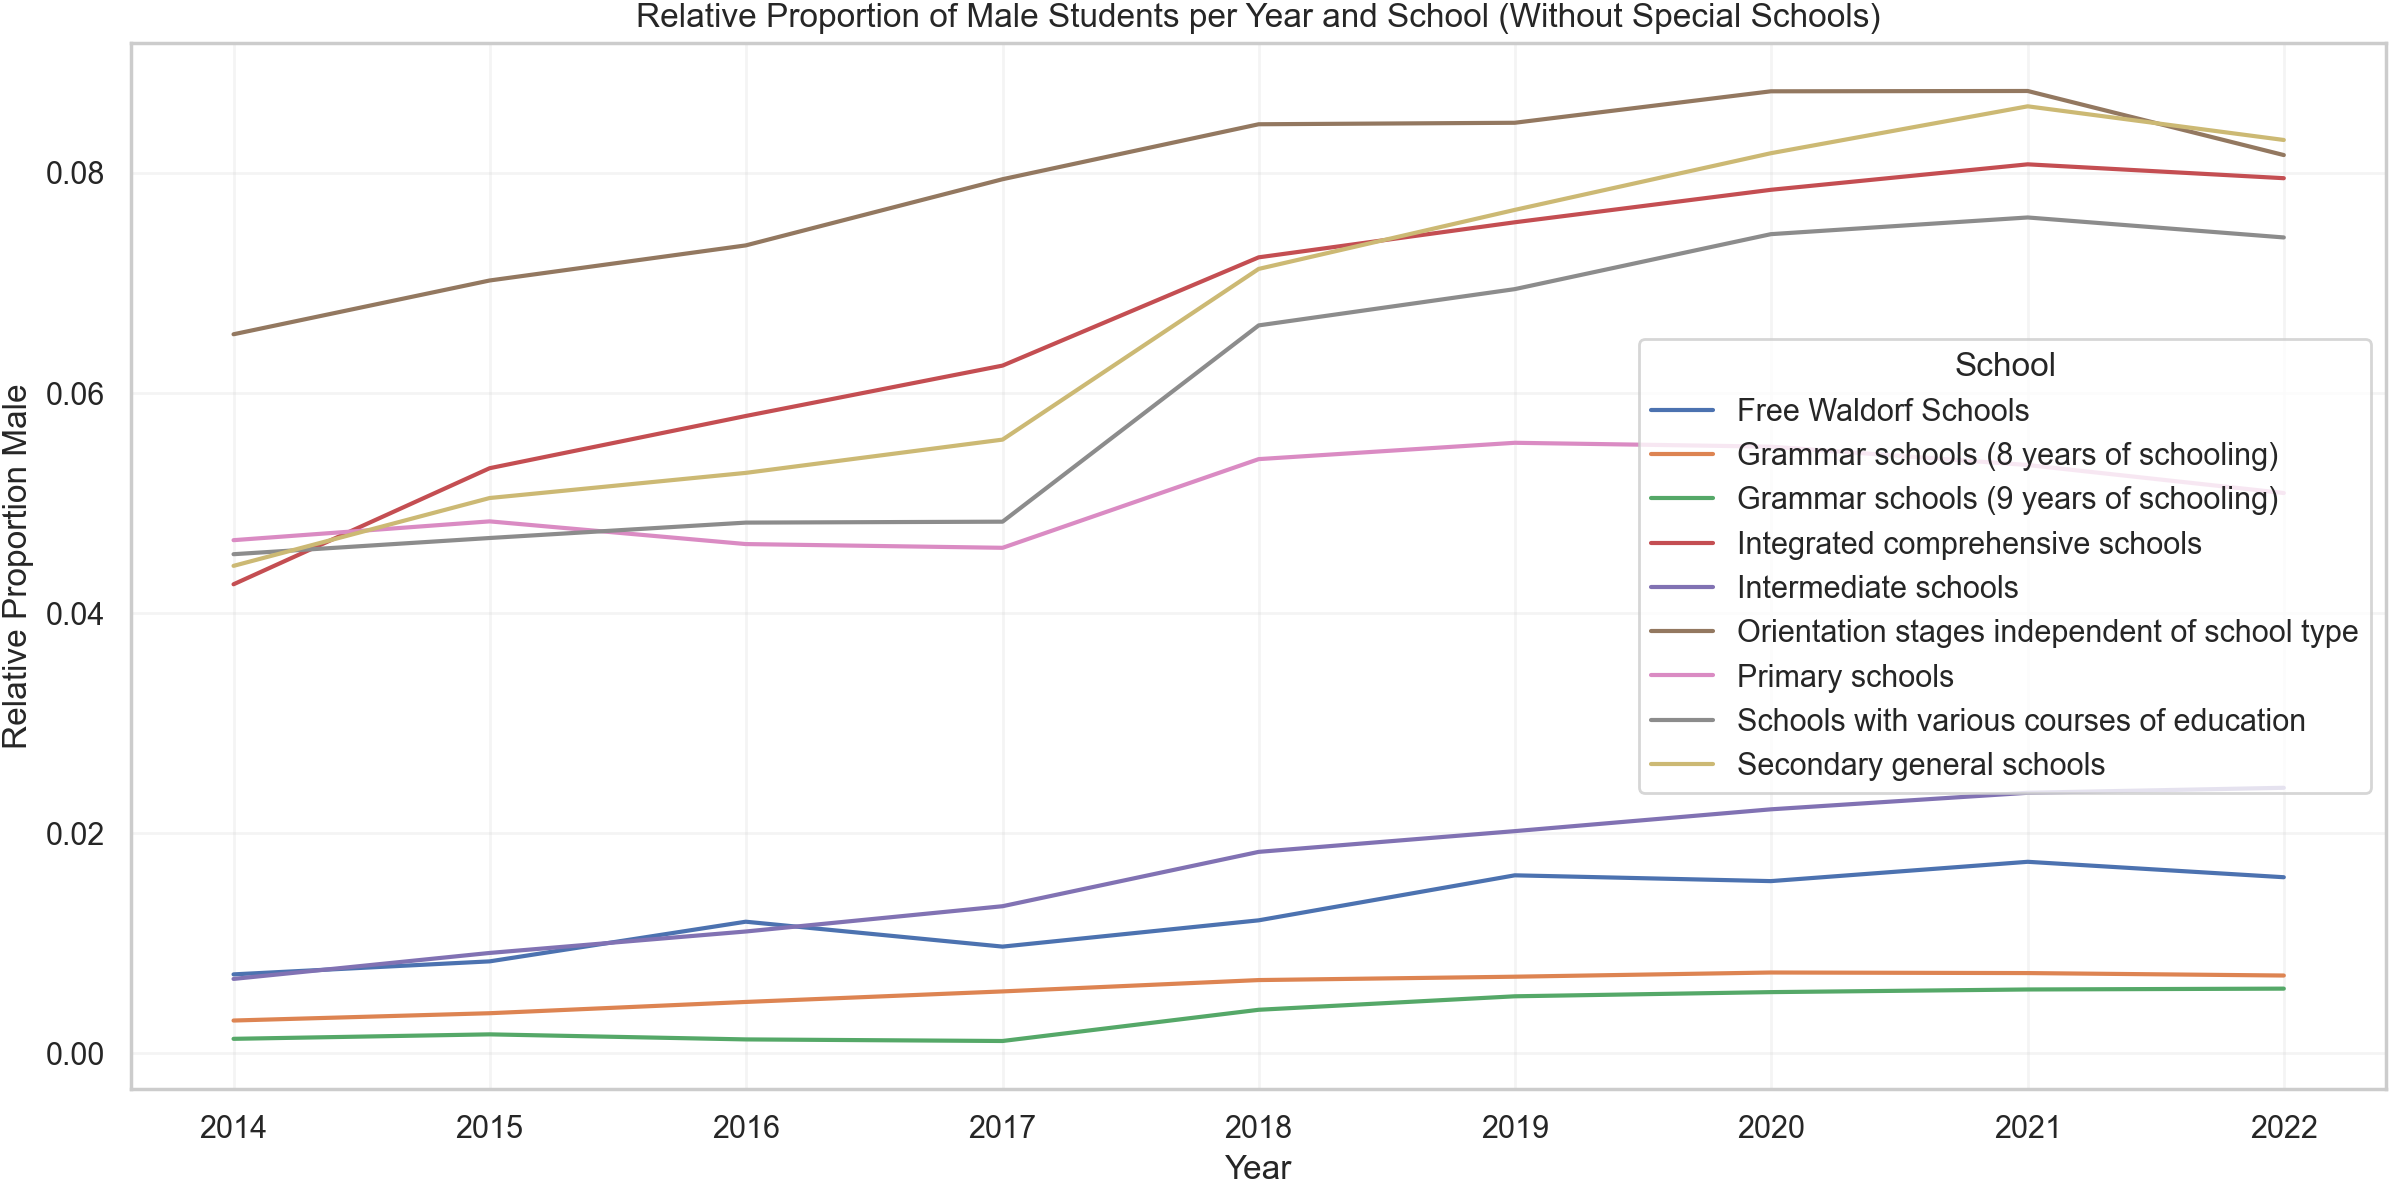

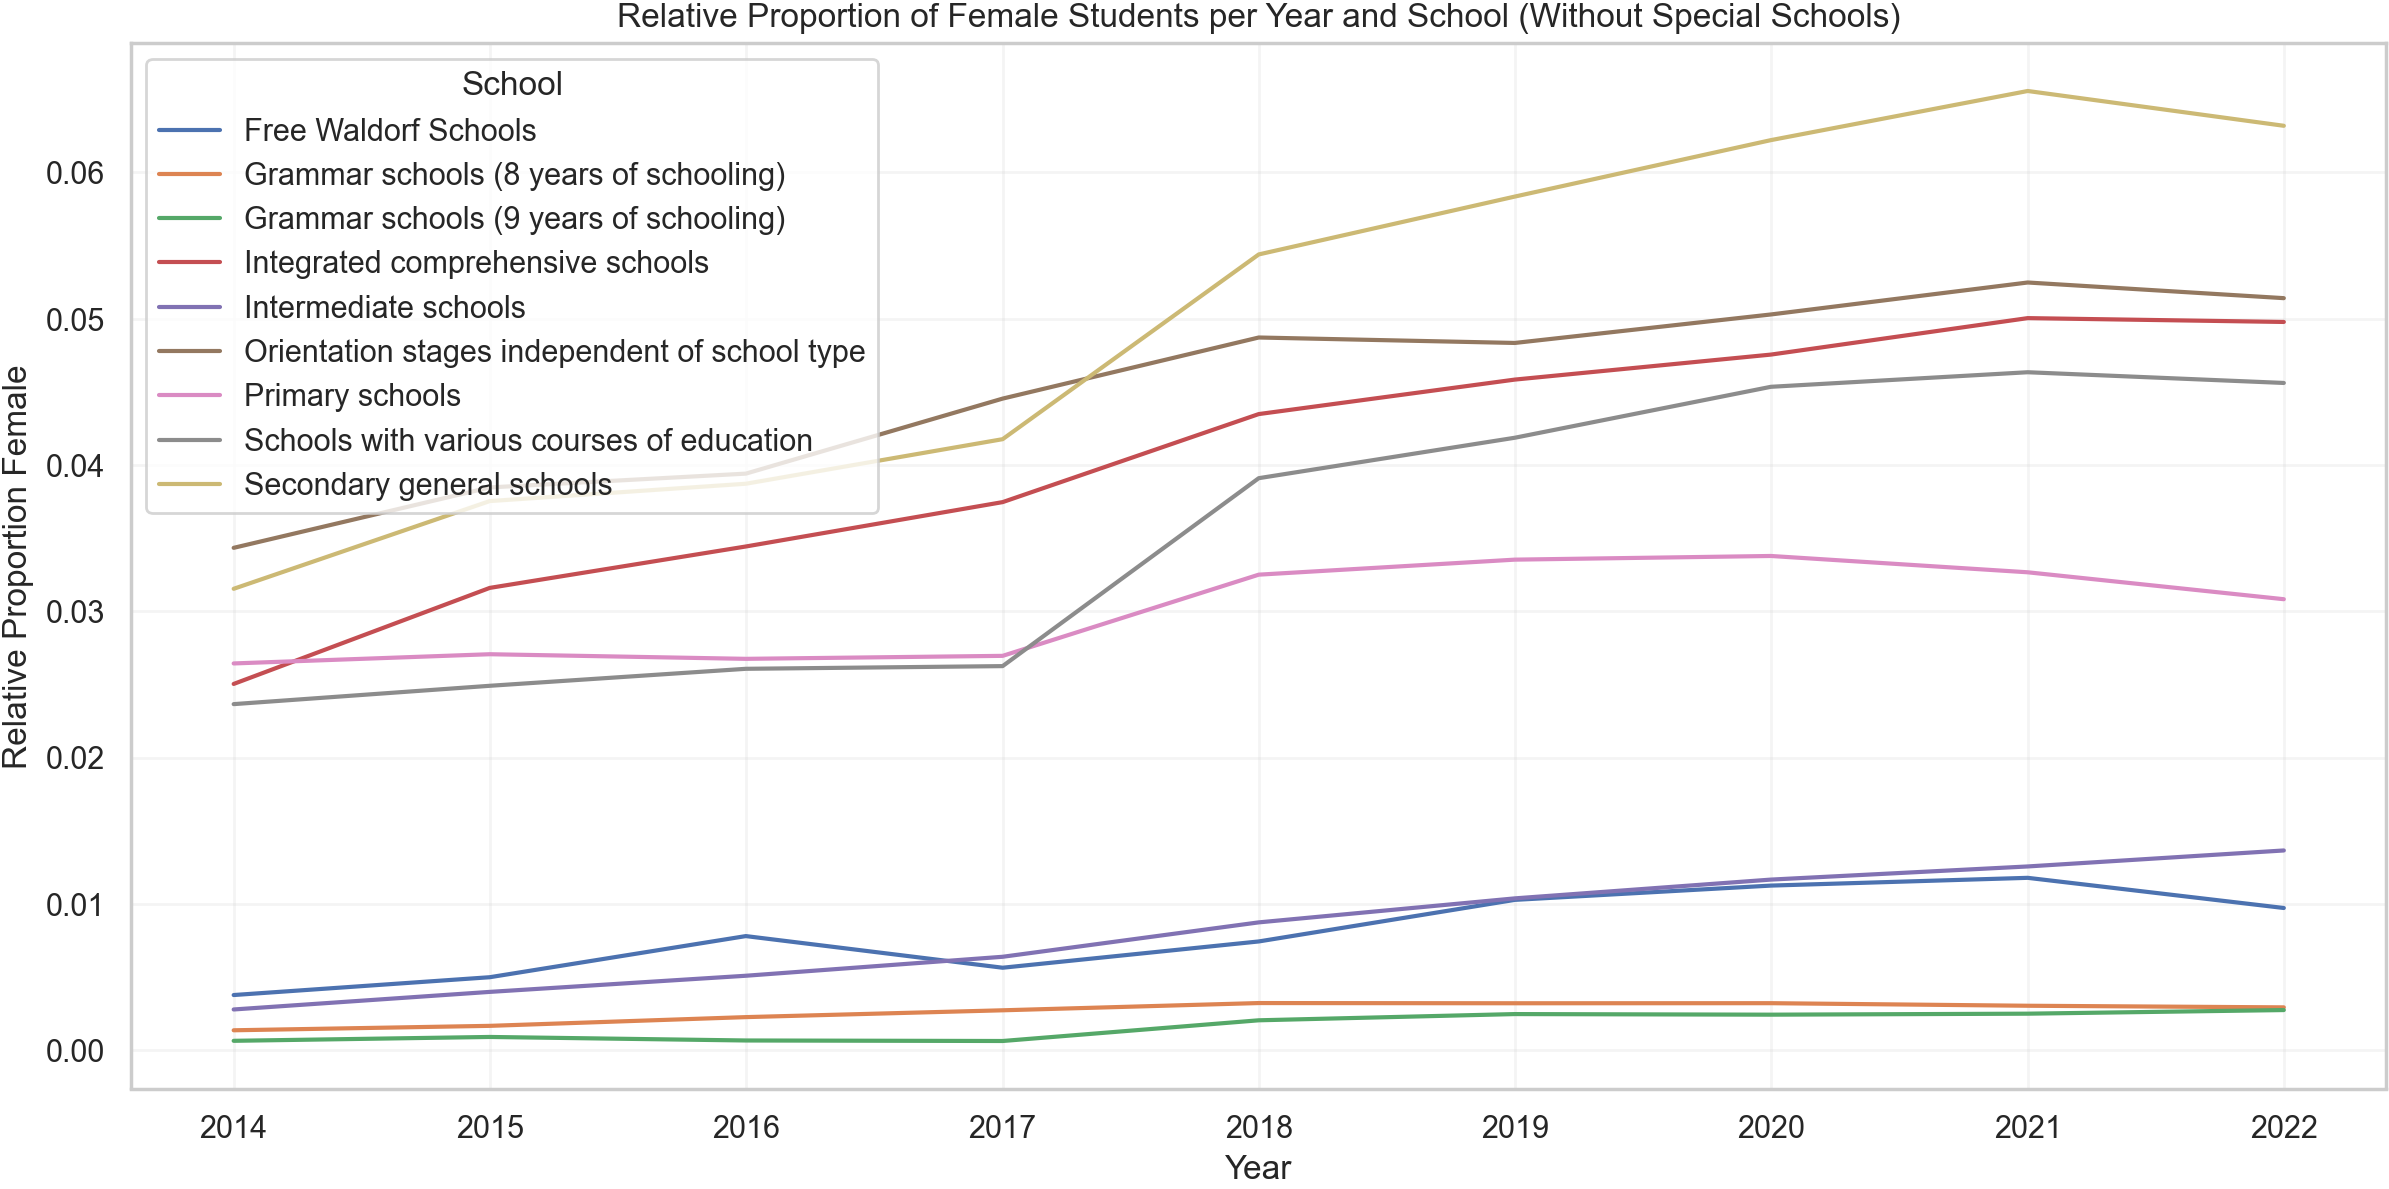

In [103]:
merged_df = load_special_edu_support_percentage(ignore_special_schools=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Jetzt können Sie die Visualisierung durchführen


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_male', hue='school', data=merged_df)
plt.title('Relative Proportion of Male Students per Year and School (Without Special Schools)'fontsize=14)
plt.xlabel('Year')
plt.ylabel('Relative Proportion Male')
plt.legend(title='School')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_female', hue='school', data=merged_df)
plt.title('Relative Proportion of Female Students per Year and School (Without Special Schools)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Relative Proportion Female')
plt.legend(title='School')

plt.show()